# EDA

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from datetime import datetime
import calendar

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('fivethirtyeight')

In [2]:
# Load data
df = pd.read_csv('../data/clean_df.csv')

In [3]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


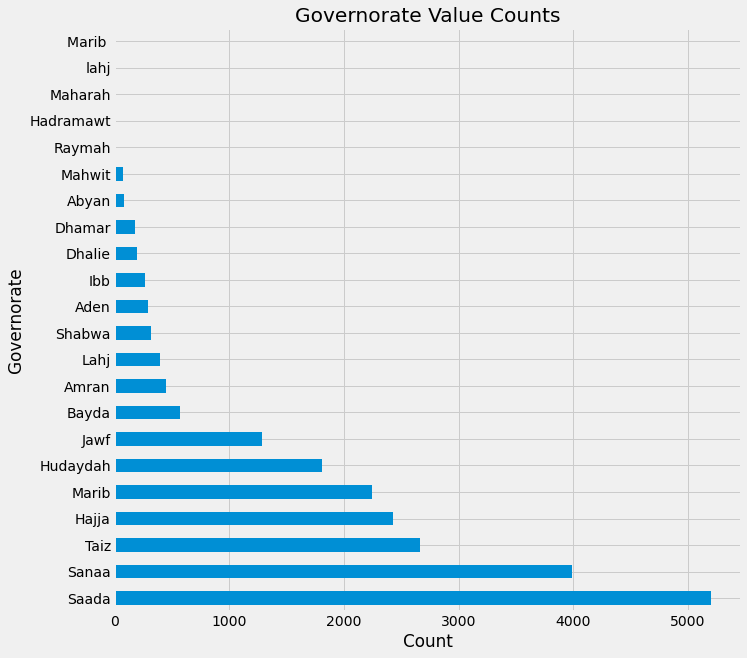

In [46]:
# Value counts for governorate
df.governorate.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Governorate Value Counts')
plt.ylabel('Governorate')
plt.xlabel('Count');
plt.savefig('../images/governorate_dist.png');

This bar chart shows the distribution of governate with each individual count being an air raid in that governate. From
this chart we are able to establish the most common governates to be attacked.

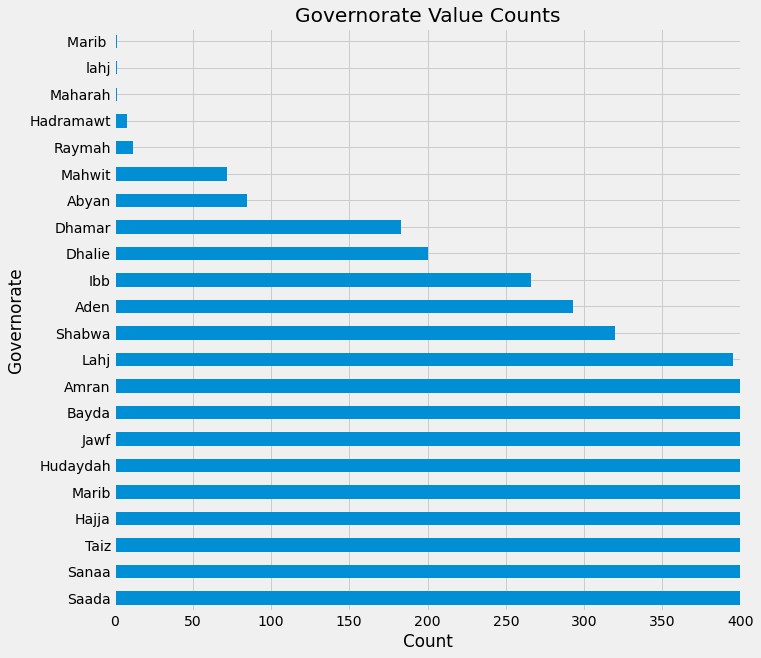

In [37]:
# Value counts for governorate with more granularity for the smaller values
df.governorate.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Governorate Value Counts')
plt.ylabel('Governorate')
plt.xlabel('Count')
plt.xlim(0, 400);


This graph shows the graularity from less than 500 values for governorate. This is the same graph from above.

In [6]:
district_vals =  df['district'].value_counts().loc[lambda x : x>100] 

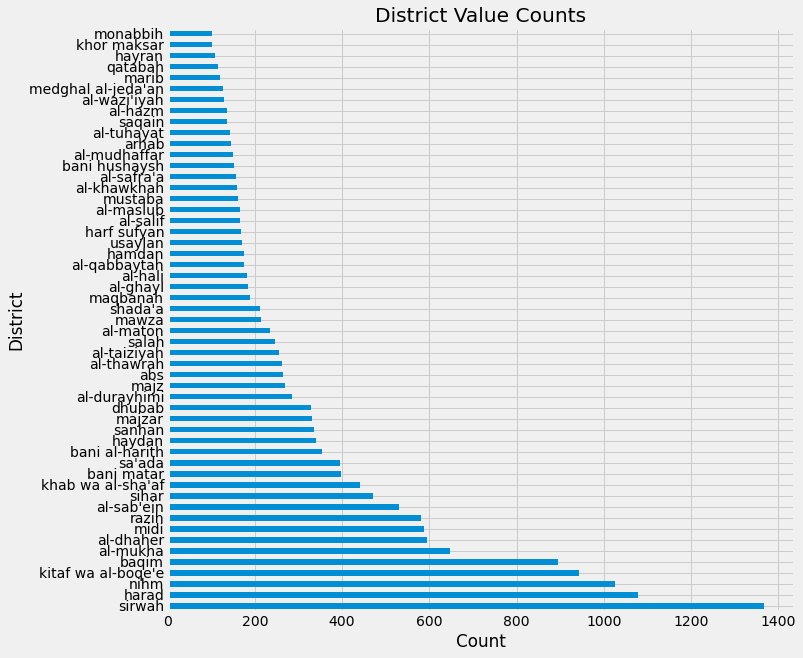

In [45]:
# Value counts for district where value counts is greater than 100 
district_vals.plot(kind='barh', figsize=(10,10))
plt.title('District Value Counts')
plt.ylabel('District')
plt.xlabel('Count');
plt.savefig('../images/district_dist.png');

This bar chart shows the distribution of district with each individual count being an air raid in that district. From
this chart we are able to establish the most common districts to be attacked. This area data will prove usefull for our
problem statement as we seek to link the location of the raid with civilian casualty figures.

In [8]:
area_vals = df['area'].value_counts().loc[lambda x : x>100] 

In [9]:
area_vals # what is this - ?? Need to go back and clean that up

-                    4360
Unknown              3300
The City              250
Al-Nahdain            247
Al-Rahabah            177
Al-Omary              145
Marran                139
Al-Mukha junction     135
Al-Jabbanah           134
Faj Attan             113
Noqom mountain        102
Name: area, dtype: int64

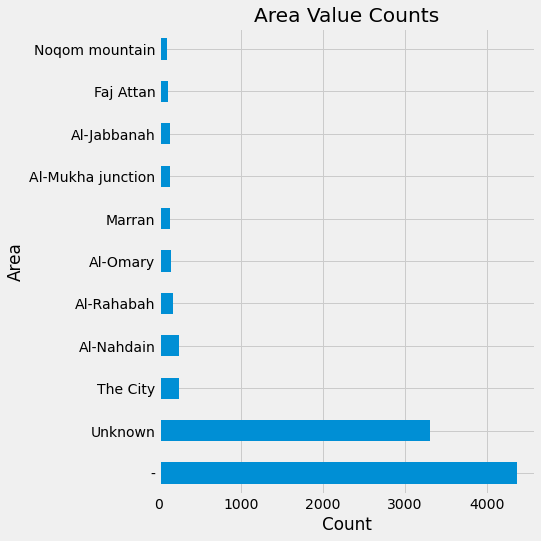

In [10]:
# Value counts for area where val counts greater than 100
area_vals.plot(kind='barh', figsize=(6,8))
plt.title('Area Value Counts')
plt.ylabel('Area')
plt.xlabel('Count');


This plot shows that the majority of our area data is unknown. However, this will prove usefull as the values included
may give more data to the model in predicting civilian casualties. This chart also limited the areas shown to areas with
100 or more values. This was done to remove unique areas with little impact to the distribuition.

In [11]:
# value counts for area when dropping 'unknown' and - 
df['area'].replace(['-', 'Unknown'], np.nan)

0                         Al-Rahabah
1                            Airport
2           Al-Sonblah Neighbourhood
3                         Al-Nahdain
4                         Al-Nahdhah
                    ...             
22480    Raymat Humayd Military Camp
22481    Raymat Humayd Military Camp
22482                     Wadi Rijam
22483                     Ar Rahabah
22484                            NaN
Name: area, Length: 22485, dtype: object

In [12]:
df['target'].value_counts()

Unknown                    8364
Pro-Houthi forces          2123
Residential Area            590
Pro-Houthi sites            403
Pro-Houthi positions        396
                           ... 
Truck carrying woods          1
Farms nursery                 1
Qatabir - Monabbih road       1
Third military region         1
Al-Salatah checkpoint         1
Name: target, Length: 2884, dtype: int64

In [13]:
target_vals =  df['target'].value_counts().loc[lambda x : x>200] 

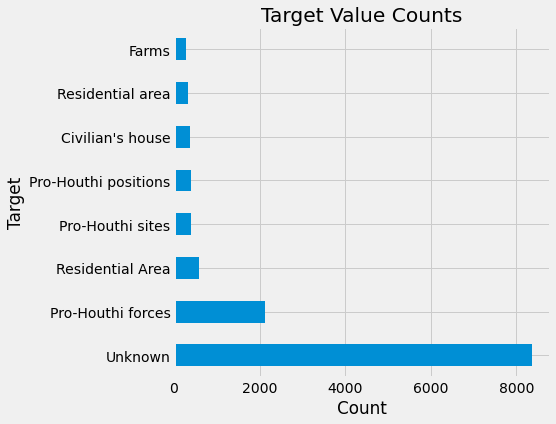

In [14]:
# Value counts for target ## may want to drop unkown to look at this 
target_vals.plot(kind='barh', figsize=(6,6))
plt.title('Target Value Counts')
plt.ylabel('Target')
plt.xlabel('Count');


This bar chart shoes the distribution of target data. as seen before this data contains a large amounts of unknowns.
This data will give use further detail regarding the information on the attack.  We are including these unknowns as this
 is the information that we will receive from the field.  The model needs to accurately estimate civilian casualties,
 with unknown data.

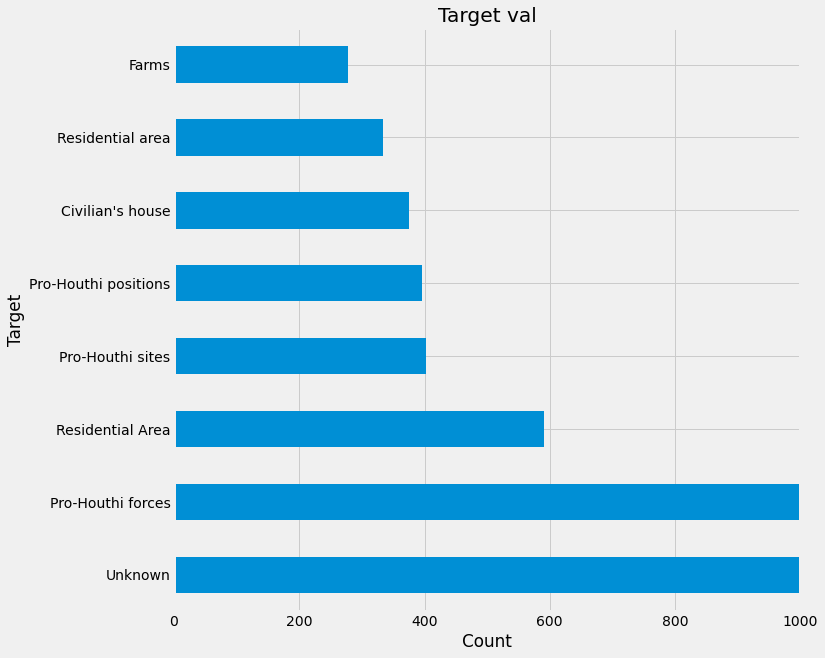

In [44]:
# Value counts for target with more granularity
target_vals.plot(kind='barh', figsize=(10,10))
plt.title('Target val')
plt.ylabel('Target')
plt.xlabel('Count')
plt.xlim(0, 1000);
plt.savefig('../images/target_val_dist.png');

This is a chart to show greater detail than the previous chart.

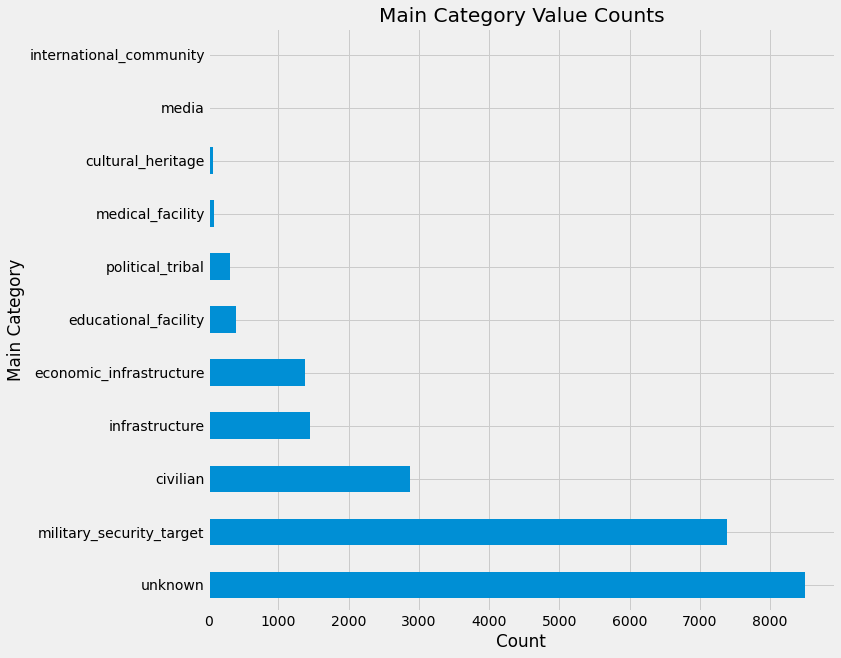

In [43]:
# Value counts for main_category
df.main_category.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Main Category Value Counts')
plt.ylabel('Main Category')
plt.xlabel('Count');
plt.savefig('../images/main_category_dist.png');

This bar chart shoes the distribution of main_catagory data. As seen before this data contains a large amounts of
unknowns. This data will give use further detail regarding the information on the attack. The main category describes
the type of structure that was attacked in the raid. We are including these unknowns as this is the information that we
will receive from the field. The model needs to accurately estimate civilian casualties, with unknown data.

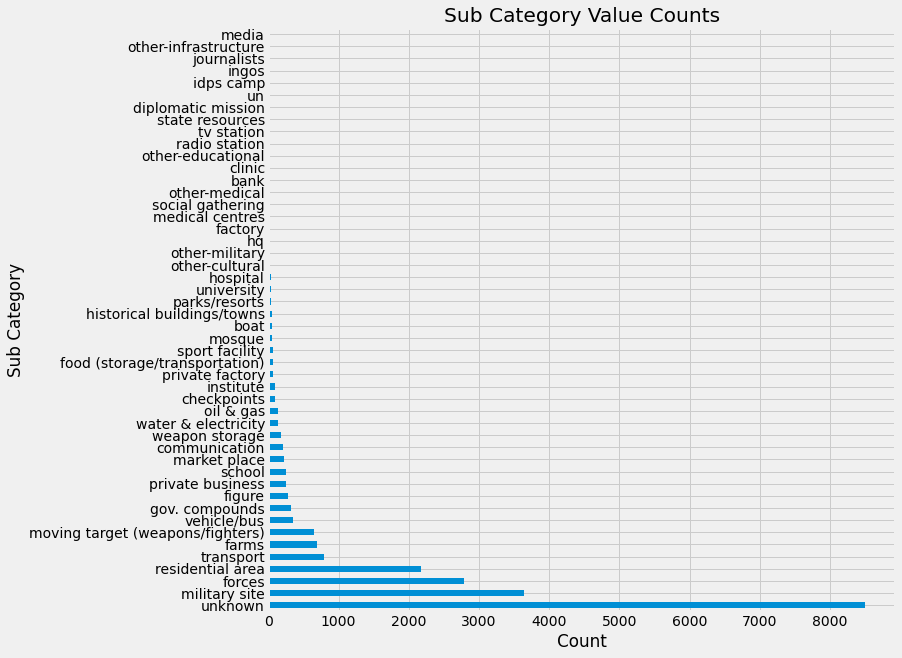

In [17]:
# Value counts for sub_category
df.sub_category.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Sub Category Value Counts')
plt.ylabel('Sub Category')
plt.xlabel('Count');

This chart shows the distribution of the sub_catagory values. As seen previously, the majority of the data is unknown.
This chart shows the different features to be used in the model.

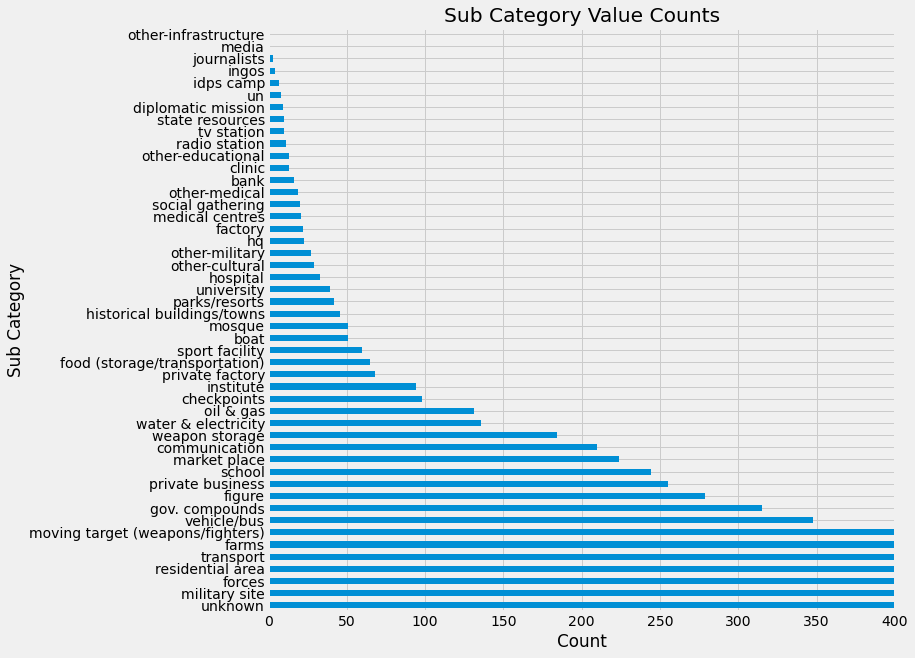

In [42]:
# Value counts for sub_category with more granularity
df.sub_category.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Sub Category Value Counts')
plt.ylabel('Sub Category')
plt.xlabel('Count');
plt.xlim(0, 400);
plt.savefig('../images/sub_category_dist.png');

This is a chart to show greater detail than the previous chart.

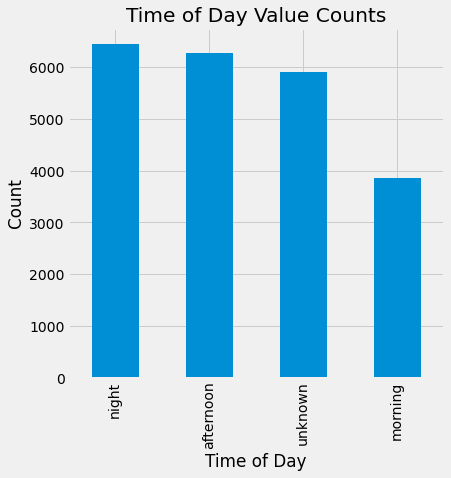

In [41]:
# Value counts for time of day
df.time_of_day.value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Time of Day Value Counts')
plt.ylabel('Count')
plt.xlabel('Time of Day');
plt.savefig('../images/time_of_day_dist.png');

This chart shows the distribuution of air raids by time. While we have a lot of unknown values, the number of unknown
values does not exceed the number of known values. This feature may prove useful for the model to estimate civilian
casualties.

In [20]:
df['max_air_raids'].describe()

count    22485.000000
mean         3.061330
std          4.493291
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        250.000000
Name: max_air_raids, dtype: float64

### Ploting Air Raid Data Over Time

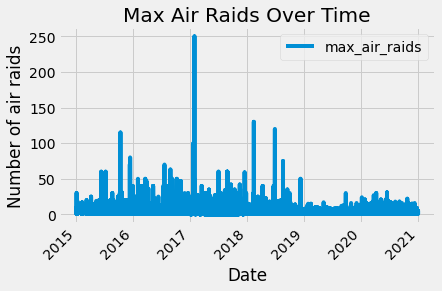

In [37]:
df.plot(x='date', y='max_air_raids')
plt.title('Max Air Raids Over Time')
plt.ylabel('Number of air raids')
plt.xlabel('Date')
plt.xticks(rotation= 45);
plt.savefig('../images/max_air_raids_over_time.png');

This graph shows the number of max air raids over time. This graph is useful to show how the conflict has escalated
and deescalated at different stages of the conflict.

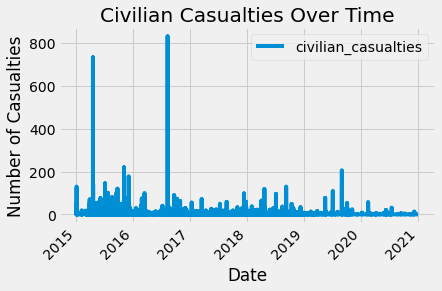

In [40]:
df.plot(x='date', y='civilian_casualties')
plt.title('Civilian Casualties Over Time')
plt.ylabel('Number of Casualties')
plt.xlabel('Date')
plt.xticks(rotation= 45);
plt.savefig('../images/civilian_casualties_over_time.png');

This graph shows some similarity to the max air raids graph however, the two are not that similiar.  This indicates that
 the number of airraids is not a direct corelation to the number of fatalities. This would shows that max air raids
 would be a good feature to have in the model.

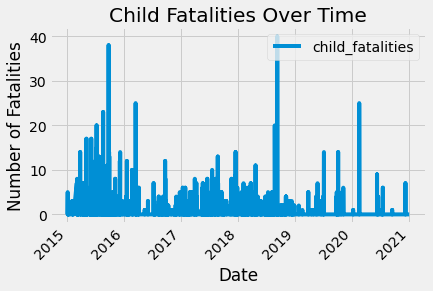

In [39]:
df.plot(x='date', y='child_fatalities');
plt.title('Child Fatalities Over Time')
plt.ylabel('Number of Fatalities')
plt.xlabel('Date')
plt.xticks(rotation= 45);
plt.savefig('../images/child_fatalities_over_time.png');

This graph shows the number of child fatalities over time.  Note that this graph does not directly match the total
civilian casualties plot.  This indicates the location of raid will be useful in predicting casualties.


Below we group the data by day, month, and year, and then will plot features we are interested in/g.

In [24]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date'] 

In [25]:
df_by_day = df.resample('D').sum()

In [26]:
df_by_month = df.resample('M').sum()

In [27]:
df_by_year = df.resample('Y').sum()

In [28]:
#this chart is redundant as it was already shown above.
#df_by_day.plot(y='civilian_casualties', use_index=True);

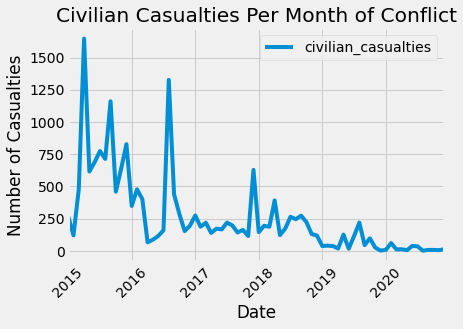

In [48]:
df_by_month.plot(y='civilian_casualties', use_index=True);
plt.title('Civilian Casualties Per Month of Conflict')
plt.ylabel('Number of Casualties')
plt.xlabel('Date')
plt.xticks(rotation= 45);
plt.savefig('../images/civilian_casualties_by_month.png');

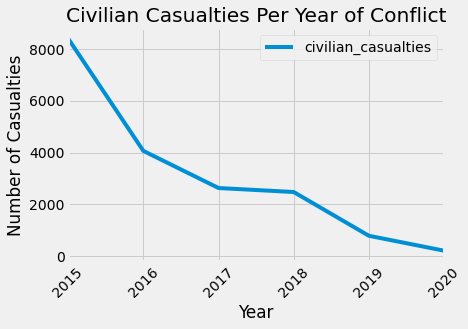

In [47]:
df_by_year.plot(y='civilian_casualties', use_index=True);
plt.title('Civilian Casualties Per Year of Conflict')
plt.ylabel('Number of Casualties')
plt.xlabel('Year')
plt.xticks(rotation= 45);
plt.savefig('../images/civilian_casualties_by_year.png');

In [31]:
#this chart is redundant as it was already shown above.
# df_by_day.plot(y='max_air_raids', use_index=True);

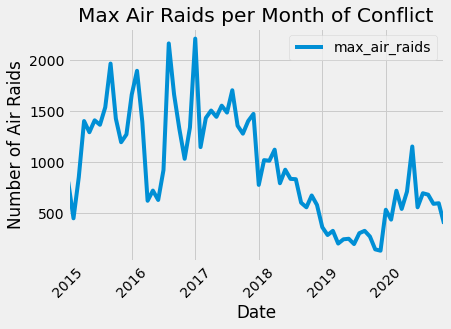

In [46]:
df_by_month.plot(y='max_air_raids', use_index=True);
plt.title('Max Air Raids per Month of Conflict')
plt.ylabel('Number of Air Raids')
plt.xlabel('Date')
plt.xticks(rotation= 45);
plt.savefig('../images/max_air_raids_by_month.png');

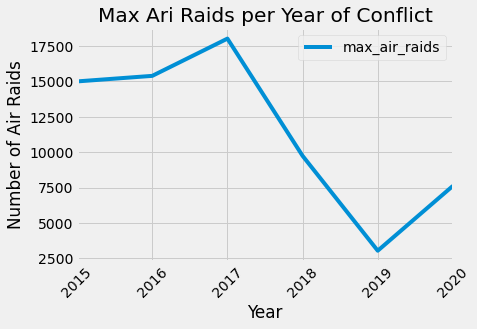

In [45]:
df_by_year.plot(y='max_air_raids', use_index=True);
plt.title('Max Ari Raids per Year of Conflict')
plt.ylabel('Number of Air Raids')
plt.xlabel('Year')
plt.xticks(rotation= 45);
plt.savefig('../images/max_air_raids_by_year.png');

In [34]:
#this chart is redundant as it was already shown above.
# df_by_day.plot(y='child_fatalities', use_index=True);

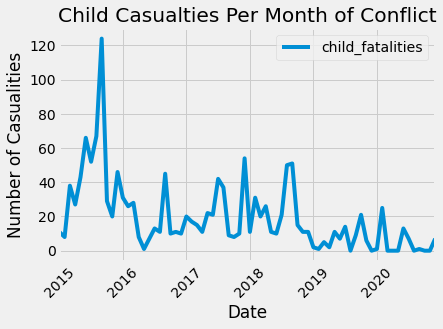

In [44]:
df_by_month.plot(y='child_fatalities', use_index=True);
plt.title('Child Casualties Per Month of Conflict')
plt.ylabel('Number of Casualities')
plt.xlabel('Date')
plt.xticks(rotation= 45);
plt.savefig('../images/child_casualties_by_month.png');

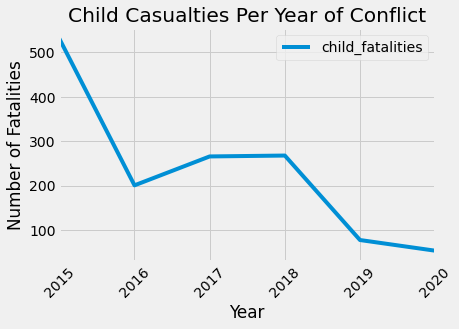

In [43]:
df_by_year.plot(y='child_fatalities', use_index=True);
plt.title('Child Casualties Per Year of Conflict')
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')
plt.xticks(rotation= 45);
plt.savefig('../images/child_casualties_by_year.png');